In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, f1_score, precision_score, recall_score

In [2]:
data = pd.read_csv(r'loan_prediction.csv')

In [3]:
print("The shape of our dataset: ", data.shape)
data

The shape of our dataset:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# We drop one unnecessary feature
data = data.drop(['Loan_ID'], axis = 1)

In [5]:
# We check for duplicated values
data.duplicated().any()

False

In [6]:
# We check for missing values and duplicates
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# As we can see we have some missing values in some of our features
# We can either choose to:
# - fill them with the: mean, median or mode
# - or remove the instance completly
# -> We choose to fill the NaN values with the mode: the prominent value of the feature

In [8]:
# Dealing with missing values

In [9]:
na_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for feature in na_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

In [10]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#GRAPHICAL SUMMARY
data['Married'] = data['Married'].replace({'Yes': 'Married', 'No': 'Single'})
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 'Allowed', 'N': 'Disallowed'})

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

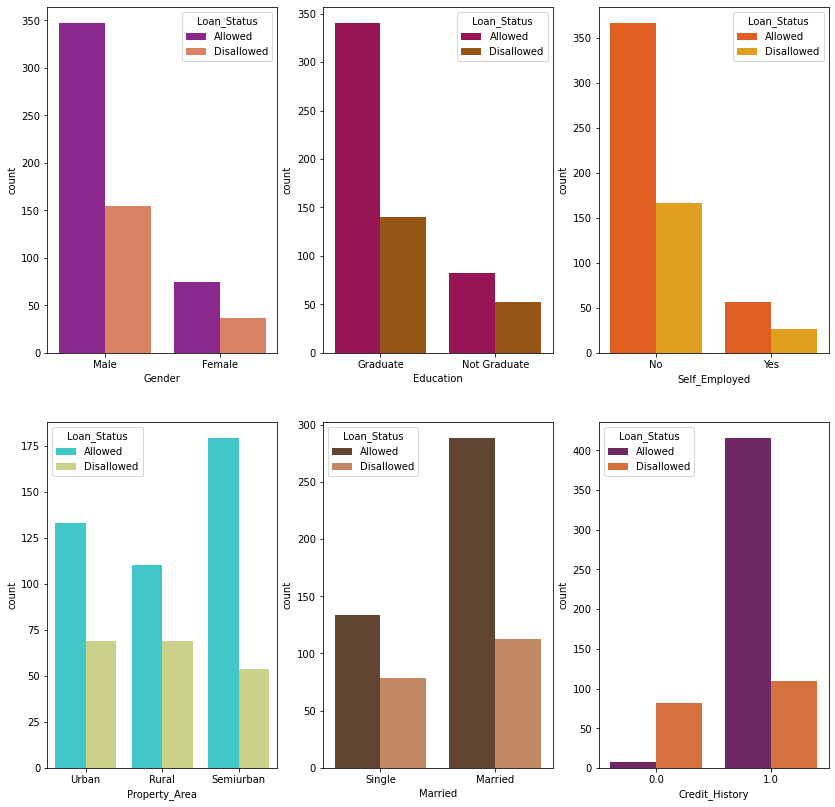

In [12]:
plt.figure(figsize = (14,14))

plt.subplot(2,3,1)
sn.countplot(data = data, x = 'Gender', hue = 'Loan_Status', palette = 'plasma')
plt.subplot(2,3,2)
sn.countplot(data = data, x = 'Education', hue = 'Loan_Status', palette = 'brg')
plt.subplot(2,3,3)
sn.countplot(data = data, x = 'Self_Employed', hue = 'Loan_Status', palette = 'autumn')
plt.subplot(2,3,4)
sn.countplot(data = data, x = 'Property_Area', hue = 'Loan_Status', palette = 'rainbow')
plt.subplot(2,3,5)
sn.countplot(data = data, x = 'Married', hue = 'Loan_Status', palette = 'copper')
plt.subplot(2,3,6)
sn.countplot(data = data, x = 'Credit_History', hue = 'Loan_Status', palette = 'inferno')




In [13]:
#From the above analysis, it can be concluded that:
#Male Individuals have more chance of receiving the Loan.
#Married Individuals have more chance of receiving the Loan.
#Graduate Individuals have more chance of receiving the Loan.
#Not Self-Employed have more chance of receiving the Loan.
#Individuals with a credit history have more chance of receiving the Loan.
#People living in Semi-Urban Area have more chance to receive the Loan.

In [14]:
# Let's plot a pie chart containing all the necessary information at once using the plotly library

In [15]:
pie = px.sunburst(data_frame = data, 
                  path = ['Gender', 'Married', 'Property_Area','Education', 'Loan_Status'], 
                  color = 'LoanAmount',
                  color_continuous_scale = 'RdBu',
                  #height  = 700,
                  #width = 700
                 )

pie.update_layout(title = {'text' : 'Loan Status VS Gender, Marrital Status, Property Area & Education',               
                  #'x':0.5,
                  #'xanchor': 'center'
                          }
                           )
pie.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-15-91f74fbc06f0>, line 11)

In [ ]:
# OUTLIERS
# One way of dealing with outliers, is to plot boxplots of different features and check their presence

In [ ]:
plt.figure(figsize = (15,2))
plt.subplot(1,2,1)
sn.boxplot(data['ApplicantIncome'])
plt.subplot(1,2,2)
sn.boxplot(data['CoapplicantIncome'])

In [ ]:
# Removing outliers from Applicant Income column
zscore = np.abs(stats.zscore(data['ApplicantIncome']))

data_clean = data[(zscore <3)]
print("The number of outlier(s) removed from the Applicant Income column is: %i" % int(data['ApplicantIncome'].shape[0] - data_clean['ApplicantIncome'].shape[0]))


# Removing outliers from Co-Applicant Income column
zscore = np.abs(stats.zscore(data['CoapplicantIncome']))

data_clean = data[(zscore <3)]
print("The number of outlier(s) removed from the Co-applicant Income column is: %i" % int(data['CoapplicantIncome'].shape[0] - data_clean['CoapplicantIncome'].shape[0]))

In [ ]:
# Feature Engineering

In [ ]:
df = data_clean.copy()


In [ ]:
# We change the binary variables from binary strings to binary integers

df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].replace({'Married': 1, 'Single': 0})
df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].replace({'Disallowed': 0, 'Allowed': 1})

# We dummify our categorical variables such as: Dependents & Property_Area using the get_dummies method 

df = pd.get_dummies(df, columns = ['Dependents', 'Property_Area', 'Gender', 'Married', 'Education', 'Self_Employed'])

df.head()

In [ ]:
#let's normalize the data
#Note: We only normalize continuous variables and not binary ones: Loan_Amount_Term, LoanAmount, CoapplicantIncome, ApplicantIncome

columns_to_normalize = df[['Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']]
columns_to_normalize = (columns_to_normalize - columns_to_normalize.mean()) / columns_to_normalize.std()
df[['Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']] = columns_to_normalize

df

### LOGISTIC REGRESSION

In [ ]:
def init_weights(x):
    
    w = np.zeros((x.shape[1], 1))
    
    return w

In [ ]:
def sigmoid(x):
  
    return 1 / (1 + np.exp(-x))

In [ ]:
def cost_function(x, y, w):
    
    m = x.shape[0]
    h = sigmoid(np.dot(x, w))
    J = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m
    
    return J
    

In [ ]:
def gradient_descent(x, y, w, alpha = 0.01):
    
    m = x.shape[0]
    h = sigmoid(np.dot(x, w))
    w = w - (alpha * (np.dot(x.T, h - y)) / m) 
    
    return w
   

In [ ]:
def logistic_regression(x, y, alpha = 0.01, delta = 0, iterations = 10000):
    
    cost_cache = []
    w = init_weights(x)
    
    cost = cost_function(x, y, w)
    cost_cache.append(cost) # We add the first calculated cost
    
    for i in range(iterations):
        w = gradient_descent(x, y, w, alpha)
        new_cost = cost_function(x, y, w)
        cost_cache.append(new_cost)
        
        
        if abs(int(new_cost) - int(cost)) < delta:
            cost = new_cost
            print("The cost function converged after %i iterations: " % i)
            break
               

    return w, cost_cache

In [ ]:
x = df.drop(['Loan_Status'], axis = 1)
y = df[['Loan_Status']]

# Adding the bias for W_0
x = np.c_[np.ones(x.shape[0]), x]

weights, cost_cache = logistic_regression(x, y, alpha = 0.01, delta = 0, iterations = 10000)

In [ ]:
plt.plot(cost_cache)

In [ ]:
def conf_mat(x, y, w):
    """ CONFUSION MATRIX """
        
    y_predict = (sigmoid(np.dot(x, weights)) > 0.5).astype(int)
    true_positives = len((y_predict + y)[y_predict + y == 2]) # We predict 1 for a 1: sum gives 2
    false_negatives = len((y - y_predict)[y - y_predict == 1]) # We predict 0 for a 1: difference gives 1
    true_negatives = len(y_predict[y_predict == 0] - false_negatives)
    false_positives = len(y_predict[y_predict == 1] - true_positives)
    
    print("## CONFUSION MATRIX ## \n")
    print("True Positives: ", true_positives)
    print("False Negatives: ", false_negatives)
    print("True Negatives: ", true_negatives)
    print("False Positives: ", false_positives)
    print()
    
    return y_predict, true_positives, false_negatives, true_negatives, false_positives

In [ ]:
def metrics(x, y, w):
    """ METRICS COMPUTATION """
    
    y_predict, true_positives, false_negatives, true_negatives, false_positives = conf_mat(x, y, weights)
    
    accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    F1 = 2 * precision * recall / (precision + recall)
    
    print("## METRICS ## \n" )
    print("The accuracy is: ", accuracy)
    print("The precision is: ", precision)
    print("The recall is: ", recall)
    print("The F1 score is: ", F1)
    print()
    
    return accuracy, precision, recall, F1

In [ ]:
print("Performance of our Logistic model:\n")
metrics(x, y, weights)



### Scikit-Learn Model

In [ ]:
##   SPLITTING
y = df[['Loan_Status']]
x = df.drop(['Loan_Status'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("training set : ", x_train.shape, y_train.shape)
print("testing set : ", x_test.shape, y_test.shape)

In [ ]:
##    MODEL

model = LogisticRegression()
model.fit(x_train, y_train.to_numpy().ravel())

predictions_train = model.predict(x_train)
predictions_test = model.predict(x_test)




In [ ]:
## Confusion Matrix & Metrics



print(" \t PERFORMANCE OF THE SCIKIT-LEARN MODEL \n")
print("Accuracy on the training set: ",model.score(x_train, y_train) * 100, "%")
print("Precision on the training set: ",precision_score(y_train, predictions_train) * 100, "%")
print("Recall on the training set: ",recall_score(y_train, predictions_train))
print("F1 score on the training set: ",f1_score(y_train, predictions_train), "\n")

print("Accuracy on the test set: ",model.score(x_test, y_test) * 100, "%")
print("Precision on the test set: ",precision_score(y_test, predictions_test) * 100, "%")
print("Recall on the test set: ",recall_score(y_test, predictions_test))
print("F1 score on the test set: ",f1_score(y_test, predictions_test), "\n")

print(" \t\t CONFUSION MATRIX \n")
## We calculate y_predict on all the dataset

predictions = model.predict(x)

confusion_mat = confusion_matrix(y, predictions) 
sn.heatmap(confusion_mat, annot = True,fmt = "d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
